Question 6: Implementing a Custom Cross-Validation Loop<br>
Task: Write a custom cross-validation loop for a Support Vector Machine model with varying 'C' parameter and plot the results.

C=0.0010, Mean CV Accuracy=0.9332
C=0.0036, Mean CV Accuracy=0.9420
C=0.0129, Mean CV Accuracy=0.9490
C=0.0464, Mean CV Accuracy=0.9490
C=0.1668, Mean CV Accuracy=0.9508
C=0.5995, Mean CV Accuracy=0.9472
C=2.1544, Mean CV Accuracy=0.9578
C=7.7426, Mean CV Accuracy=0.9595
C=27.8256, Mean CV Accuracy=0.9595
C=100.0000, Mean CV Accuracy=0.9630


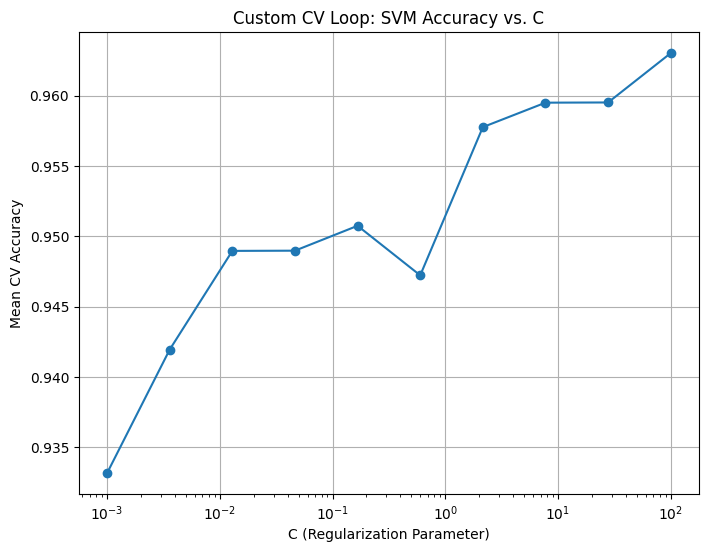

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

C_values = np.logspace(-3, 2, 10)  
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mean_accuracies = []

for C in C_values:
    accuracies = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = SVC(C=C, kernel='linear')  
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        accuracies.append(acc)
    
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)
    print(f"C={C:.4f}, Mean CV Accuracy={mean_accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(C_values, mean_accuracies, marker='o')
plt.xscale('log')

plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Mean CV Accuracy")
plt.title("Custom CV Loop: SVM Accuracy vs. C")
plt.grid(True)
plt.show()


